Using the data contained in the two data files from the previous exercise, find out how the severity of the accident is related to the age of the vehicle.

In [37]:
# import Pandas and Numpy packages

import pandas as pd
import numpy as np
import seaborn as sns #library to build data plots

sns.set_theme(palette="Set2") #particular colour palettes imported

In [38]:
# load the data
df1 = pd.read_csv("accidents.csv")
df2 = pd.read_csv("vehicles.csv")

In [39]:
# check values in the Age_of_Vehicle of the vehicles dataframe
df2["Age_of_Vehicle"].unique()

array([-1, 12,  5,  1, 10,  7, 20,  6,  4, 16, 13,  8,  2,  3, 17, 11,  9,
       14, 18, 28, 23, 15, 21, 19, 24, 54, 22, 43, 25, 31, 30, 57, 41])

"-1" in the "Age_of_Vehicle" column suggests the age of the car is unknown. Let's replace it with the `np.NaN` symbol. This will make it easier for us to drop all rows with missing values.

In [40]:
# replace "-1" with np.NaN
df2.loc[:, "Age_of_Vehicle"] = df2['Age_of_Vehicle'].replace(-1, np.NaN) #it's int so don't need to add extra brackets

<ipython-input-40-5e2541241098>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan nan nan ... nan  8.  2.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[:, "Age_of_Vehicle"] = df2['Age_of_Vehicle'].replace(-1, np.NaN) #it's int so don't need to add extra brackets


In [41]:
# drop rows with missing values
df2.dropna(inplace=True)

Choose appropriate options of `merge` to combine the accidents and the vehicle dataframes. Check that the merge was successful.

In [42]:
df1

,Accident_Index,Accident_Severity,Date,Weather_Conditions
0,2019010157094,3,11/01/2019,1
1,2019010158259,3,18/01/2019,1
2,2019010159183,3,22/01/2019,3
3,2019010159292,3,23/01/2019,1
4,2019010159565,3,25/01/2019,1
...,...,...,...,...
995,201997GK00306,3,03/06/2019,1
996,201997NA01704,3,25/04/2019,2
997,201997ND00503,2,24/03/2019,2
998,201997UC70505,1,19/05/2019,1


In [43]:
df2

,Accident_Index,Age_of_Vehicle
45,2019010165114,12.0
48,2019010166612,5.0
49,2019010166612,1.0
53,2019010167173,5.0
54,2019010167173,10.0
...,...,...
2109,2019970908081,4.0
2112,201997GK00306,1.0
2113,201997NA01704,2.0
2117,2019980871739,8.0


In [44]:
df= pd.merge(df1, df2, how= "inner", on= "Accident_Index")

In [45]:
df

,Accident_Index,Accident_Severity,Date,Weather_Conditions,Age_of_Vehicle
0,2019010165114,2,23/02/2019,9,12.0
1,2019010166612,3,04/03/2019,1,5.0
2,2019010166612,3,04/03/2019,1,1.0
3,2019010167173,3,01/03/2019,1,5.0
4,2019010167173,3,01/03/2019,1,10.0
...,...,...,...,...,...
1546,2019970908081,3,09/12/2019,1,4.0
1547,201997GK00306,3,03/06/2019,1,1.0
1548,201997NA01704,3,25/04/2019,2,2.0
1549,2019980871739,3,23/08/2019,1,8.0


Determine the relationship between the severity of the accident and the age of the vehicle.

<Axes: xlabel='Age_of_Vehicle', ylabel='Accident_Severity'>

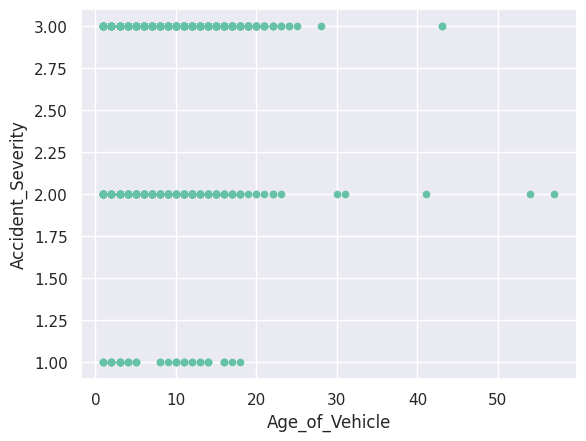

In [46]:
df.plot.scatter("Age_of_Vehicle", "Accident_Severity")

<Axes: title={'center': 'Age_of_Vehicle'}, xlabel='Accident_Severity'>

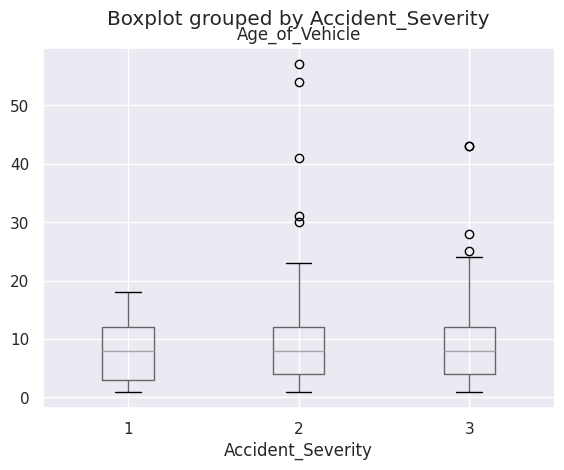

In [51]:
df.boxplot("Age_of_Vehicle", by= "Accident_Severity")

mean of the 3 categories are very similar also the interquarlitile range--> visually shows no real difference of age of vehicle and vehicle

quanitiabtielly--> run ANOVA... compare the means

# Citing this notebook

If you use this notebook in your work, please cite it as follows:
    
Pekar, V. (2022). Big Data for Decision Making. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/vpekar/bd4dm